This tutorial has been taken from the [YouTube video](https://youtu.be/EqLBAmtKMnQ) by [Krish Naik](https://www.youtube.com/channel/UCNU_lfiiWBdtULKOw6X0Dig).

## Univariate Selection
This uses statistical tests such as chi-square test for feature selection. SelectKBest function from scikit-learn library is used for this purpose.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
data = pd.read_csv('train.csv')
X = data.iloc[:, 0:20] # independent columns
y = data.iloc[:, -1] # target column i.e. price range

In [3]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

In [4]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [5]:
# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score'] # naming the dataframe columns

In [7]:
featureScores

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [8]:
print(featureScores.nlargest(10, 'Score')) # print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


## Feature Importance
Feature importance is an in-built class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [10]:
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [11]:
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers

[0.06083691 0.01965696 0.03196559 0.01926738 0.03128855 0.01641596
 0.03418564 0.0329901  0.03594869 0.03302916 0.03355427 0.04605936
 0.0491578  0.40480148 0.03300293 0.03237611 0.03351559 0.01365801
 0.01895791 0.01933162]


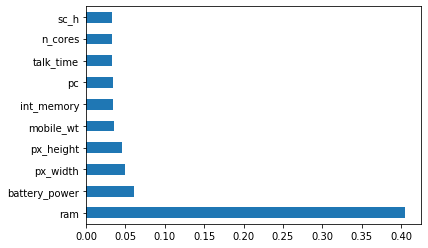

In [12]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [13]:
# Correlation matrix with HeatMap
import seaborn as sns

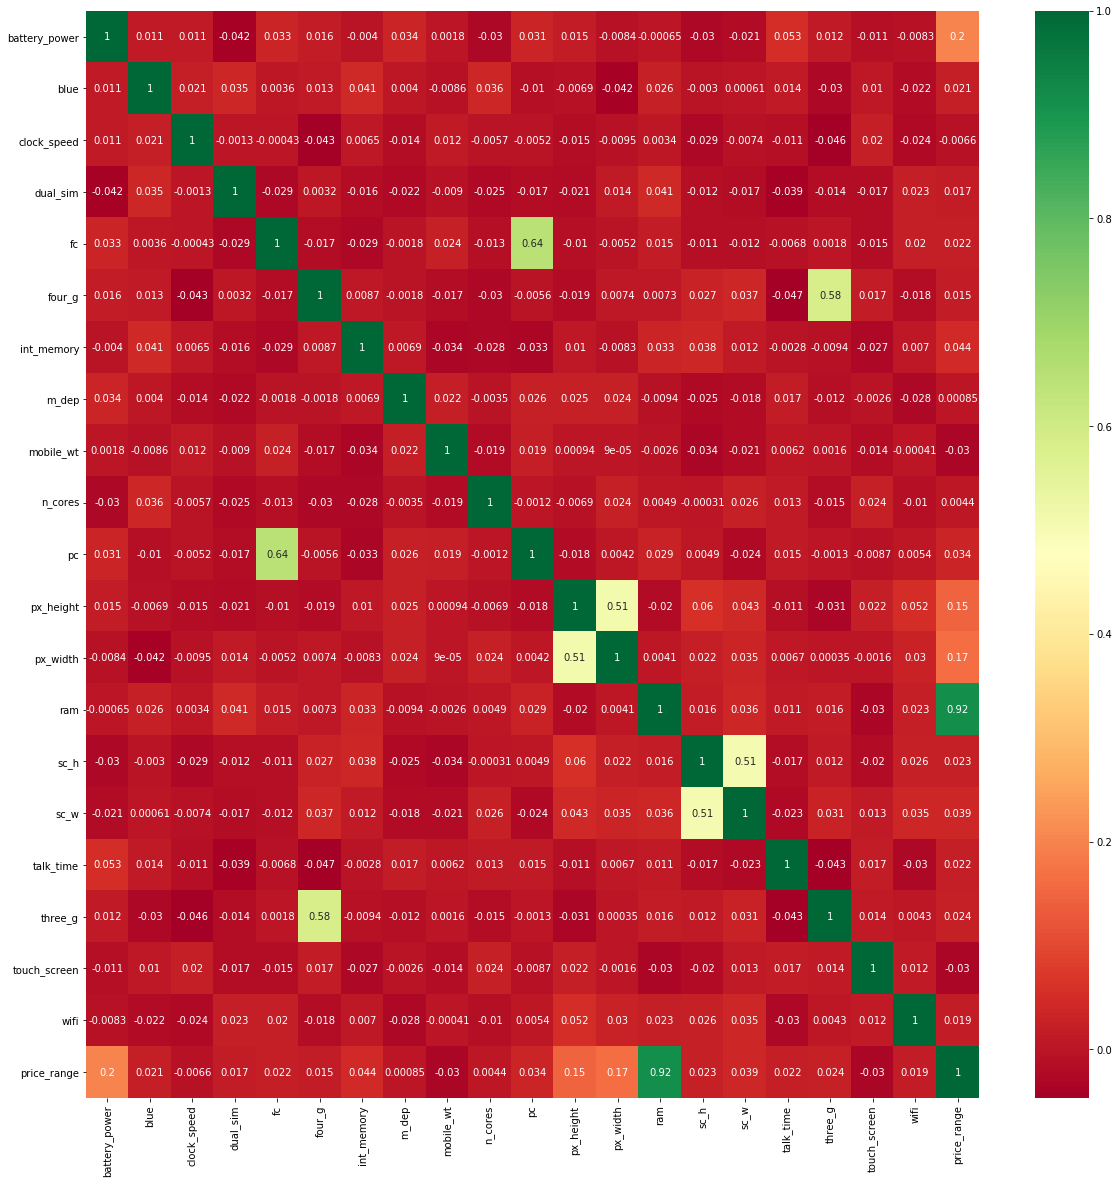

In [14]:
# get correlations of each feature in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
# plot heatmap
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='RdYlGn')